In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import utc  # Needed to support dtype=datetime64[ns, UTC] from Pandas and datetime.datetime comparison
data = pd.read_csv('assets/csv/reviews.csv', parse_dates=['Timestamp'])  # Timestamp column is parsed as text otherwise
data.head()  # first 5 rows of the data file

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Aggregation grouping by day ##

- ***Create an additional column called day***
- Reason for this is Timestamp includes dat + time components and is hard to aggregate with this level of granularity in the data.
- Solution: Export the date component of the 'Timestamp' column and group by the new column instead.

In [2]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
day_average

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


- ***Now, the problem with this is Day is actually now the index and Rating is the only column***

### Plotting the data ###

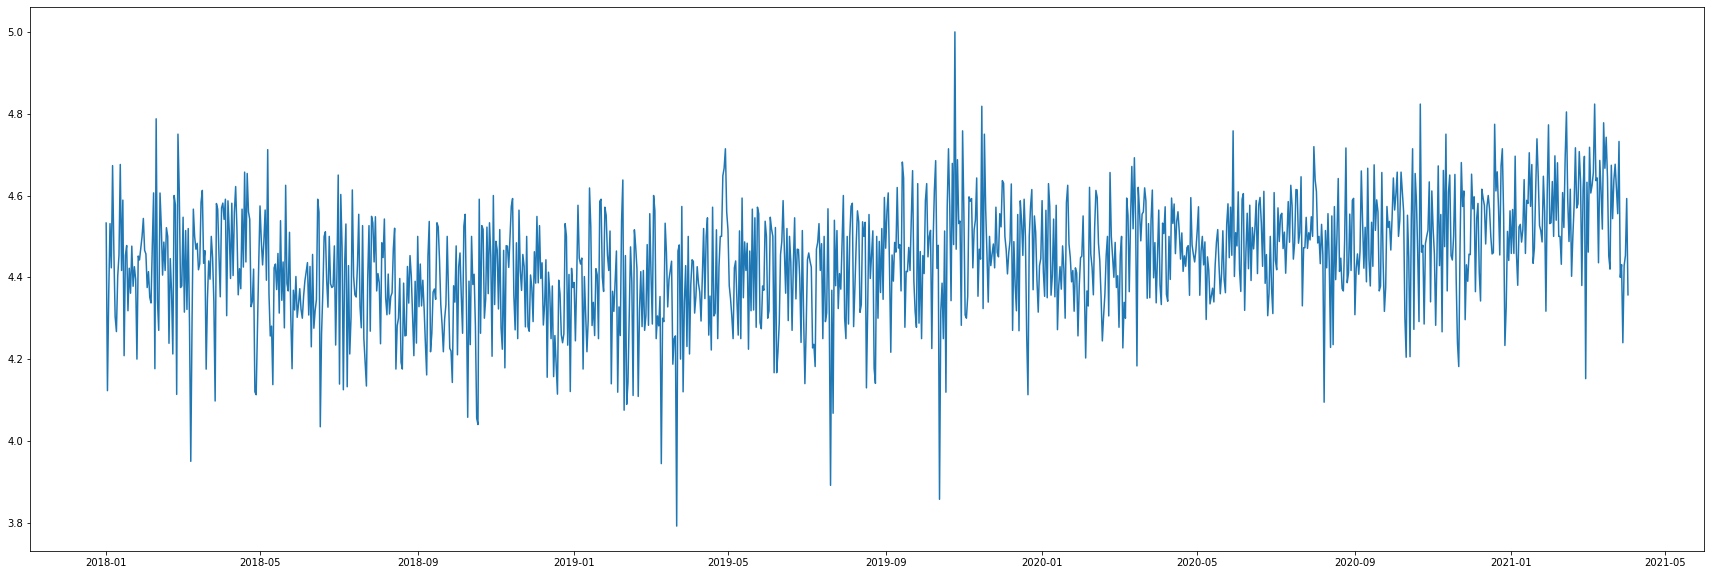

In [3]:
plt.figure(figsize=(30, 10))  # change the plot area from the default
plt.plot(day_average.index, day_average['Rating'])

- ***This is not particularly useful as a graph though***

## Rating Average by Week ##

In [4]:
data['Week'] = data['Timestamp'].dt.isocalendar().week
data['Week']

0        13
1        13
2        13
3        13
4        13
         ..
44995     1
44996     1
44997     1
44998     1
44999     1
Name: Week, Length: 45000, dtype: UInt32

- ***Using `.dt.isocalendar().week` is only returning the week number so will lead to agregating the data from the same week in all years. This isn't what we need unfortunately***
- A better way is to use `dt.strftime('%Y-%U')` as shown below

In [5]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
data['Week']

0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Week, Length: 45000, dtype: object

In [6]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


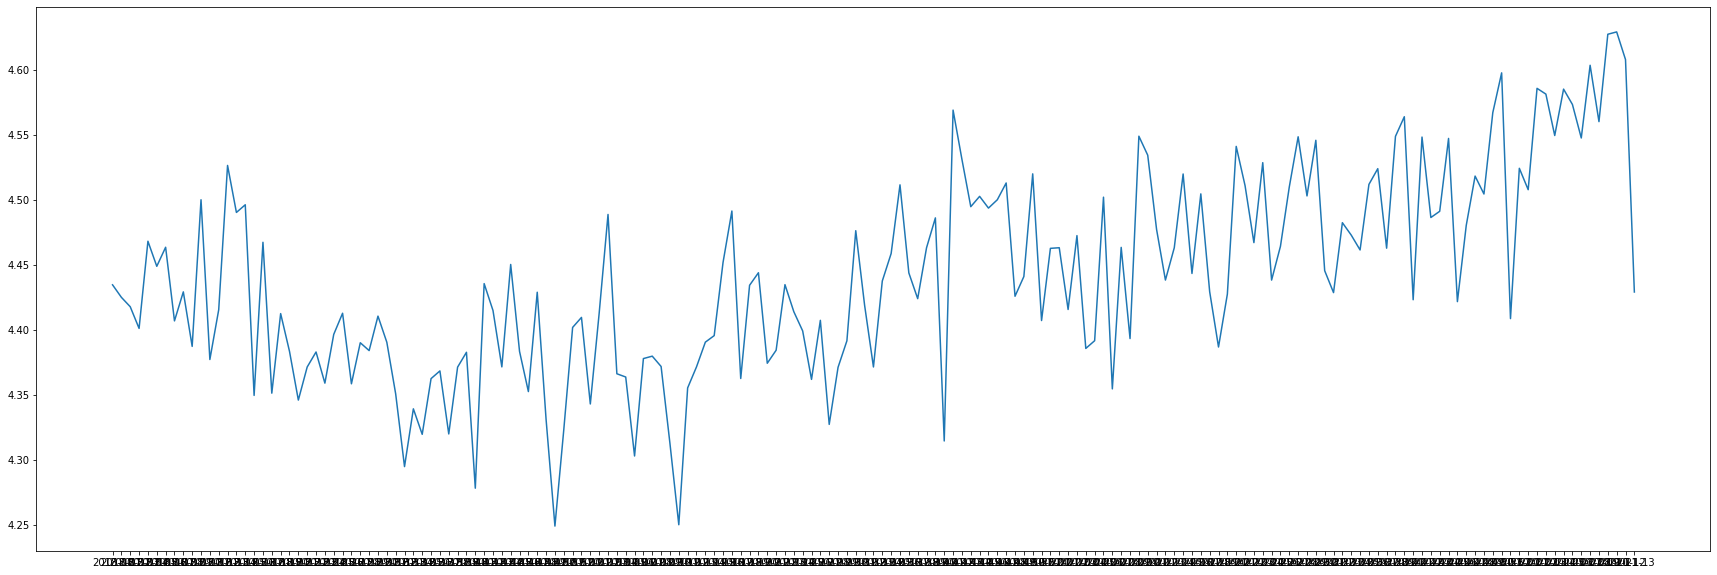

In [7]:
plt.figure(figsize=(30, 10))  # change the plot area from the default
plt.plot(week_average.index, week_average['Rating'])

- ***The date axis labels are all overlapping. It's not worth fixing as we can use better tools to display the data.***

## Average Rating by Month ##

In [8]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
data['Month']

0        2021-04
1        2021-04
2        2021-04
3        2021-04
4        2021-04
          ...   
44995    2018-01
44996    2018-01
44997    2018-01
44998    2018-01
44999    2018-01
Name: Month, Length: 45000, dtype: object

In [9]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
month_average

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420
2018-06,4.375379
2018-07,4.393184
2018-08,4.344753
2018-09,4.347247


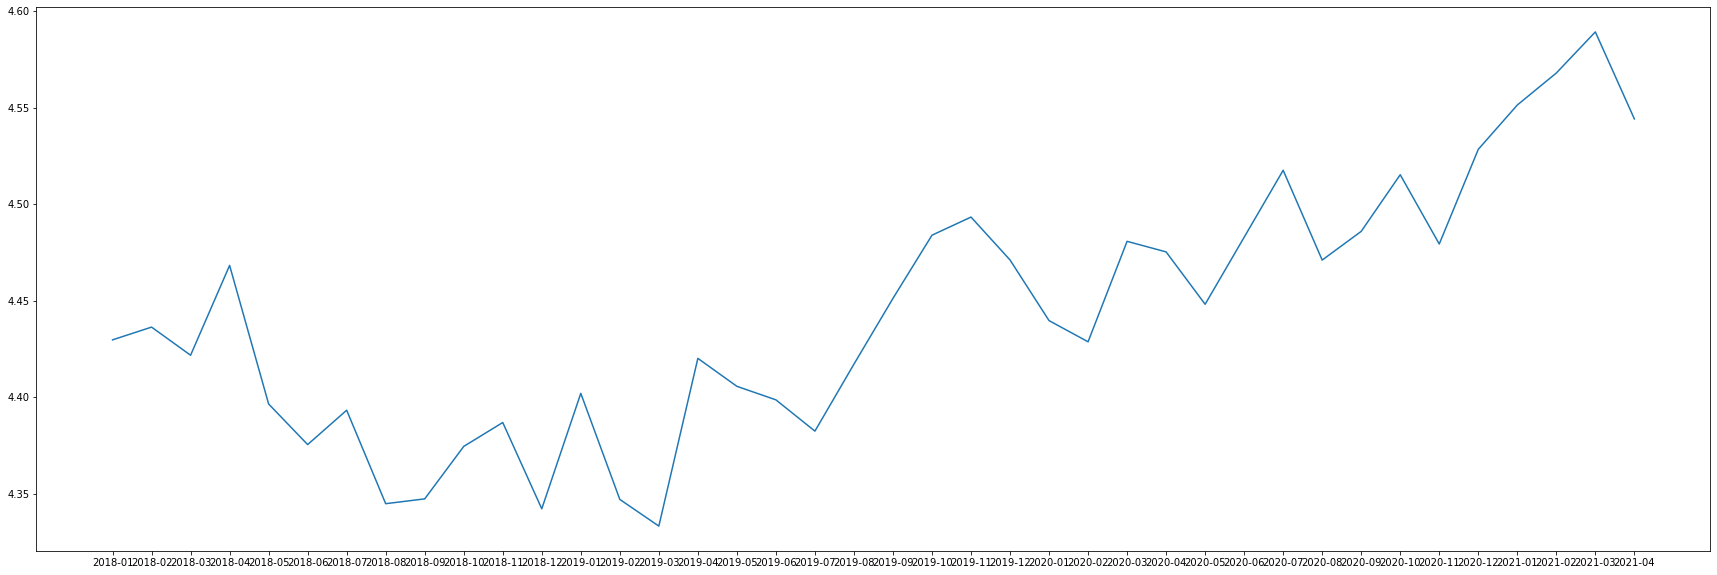

In [10]:
plt.figure(figsize=(30, 10))  # change the plot area from the default
plt.plot(month_average.index, month_average['Rating'])

## Average Rating by month by Course ##

In [11]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean()
month_average_crs

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
...                                                              ...
2021-03 The Python Mega Course: Build 10 Real World App...  4.632018
2021-04 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Interactive Data Visualization with Python and ...  5.000000
        The Complete Python Course: Build 10 Profession...  4.250000
        The Python Mega Course: Build 10 Real World App...  4.576923

[262 rows x 1 columns]

### Use .`.unstack()` to create a type of Pivot Table ###

In [12]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

<AxesSubplot:xlabel='Month'>

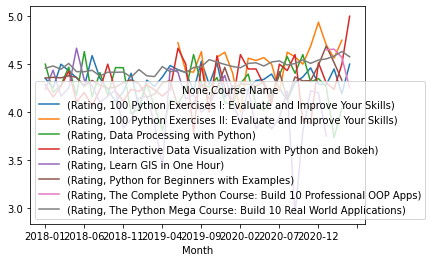

In [13]:
month_average_crs.plot()

- ***Very messy result***

<AxesSubplot:xlabel='Month'>

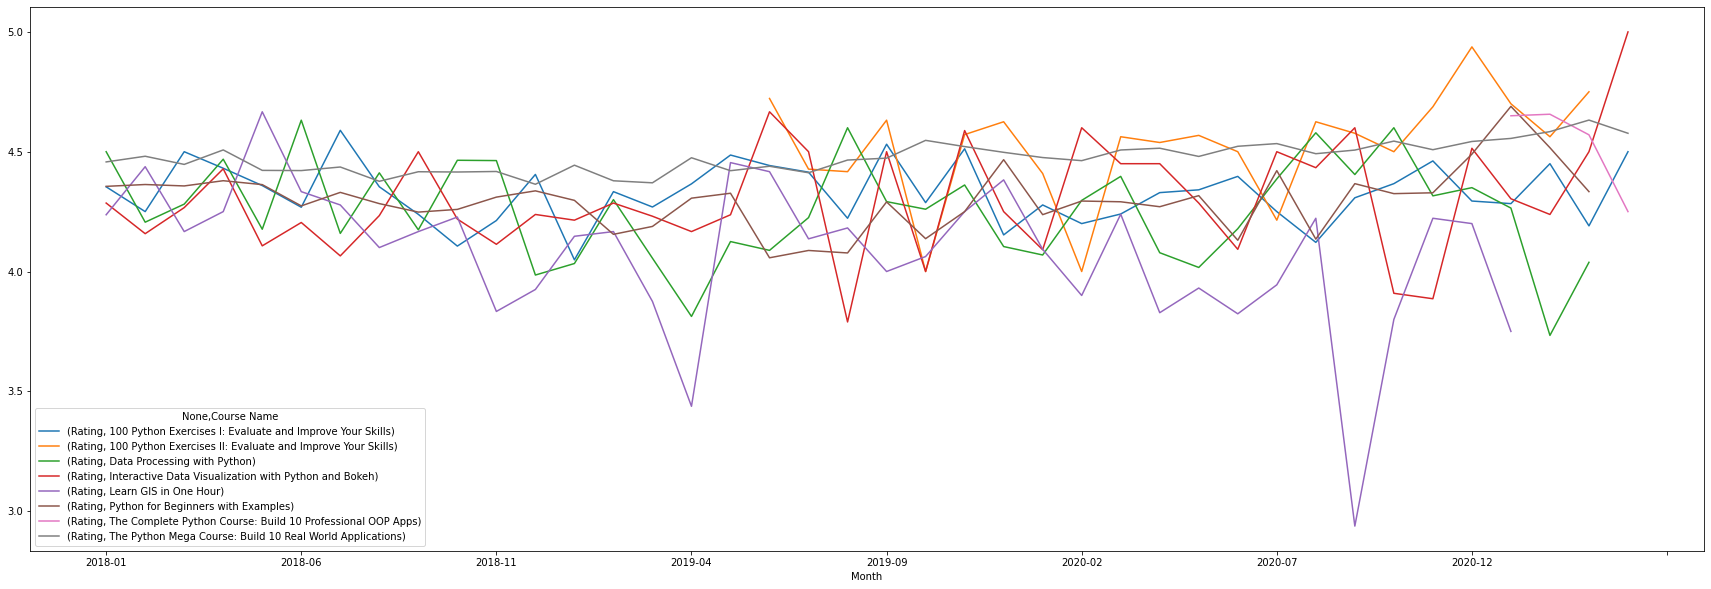

In [14]:
month_average_crs.plot(figsize=(30, 10))

- ***Better but still can be improved visually***

## What day are the Students the happiest ##

In [15]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_average = data.groupby(['Weekday']).mean()
weekday_average

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


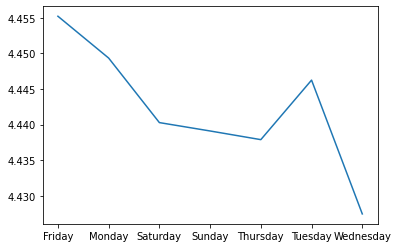

In [16]:
plt.plot(weekday_average.index, weekday_average['Rating'])

- ***The weekdays are string values and so are sorted in alphabetic order***

### Fix the ordering of the days axis ###

In [17]:
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday,5


In [18]:
weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
weekday_average

,,Rating
Weekday,Daynumber,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


In [19]:
weekday_average.index

MultiIndex([(   'Sunday', '0'),
            (   'Monday', '1'),
            (  'Tuesday', '2'),
            ('Wednesday', '3'),
            ( 'Thursday', '4'),
            (   'Friday', '5'),
            ( 'Saturday', '6')],
           names=['Weekday', 'Daynumber'])

- ***The `weekday_average.index` is a tuple which will cause the `plot()` function to give an error: `TypeError: 'value' must be an instance of str or bytes, not a tuple`***

- Use the `weekday_average.index.get_level_values(0)` to extract the weekday name from the tuple

In [20]:
weekday_average.index.get_level_values(0)

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='Weekday')

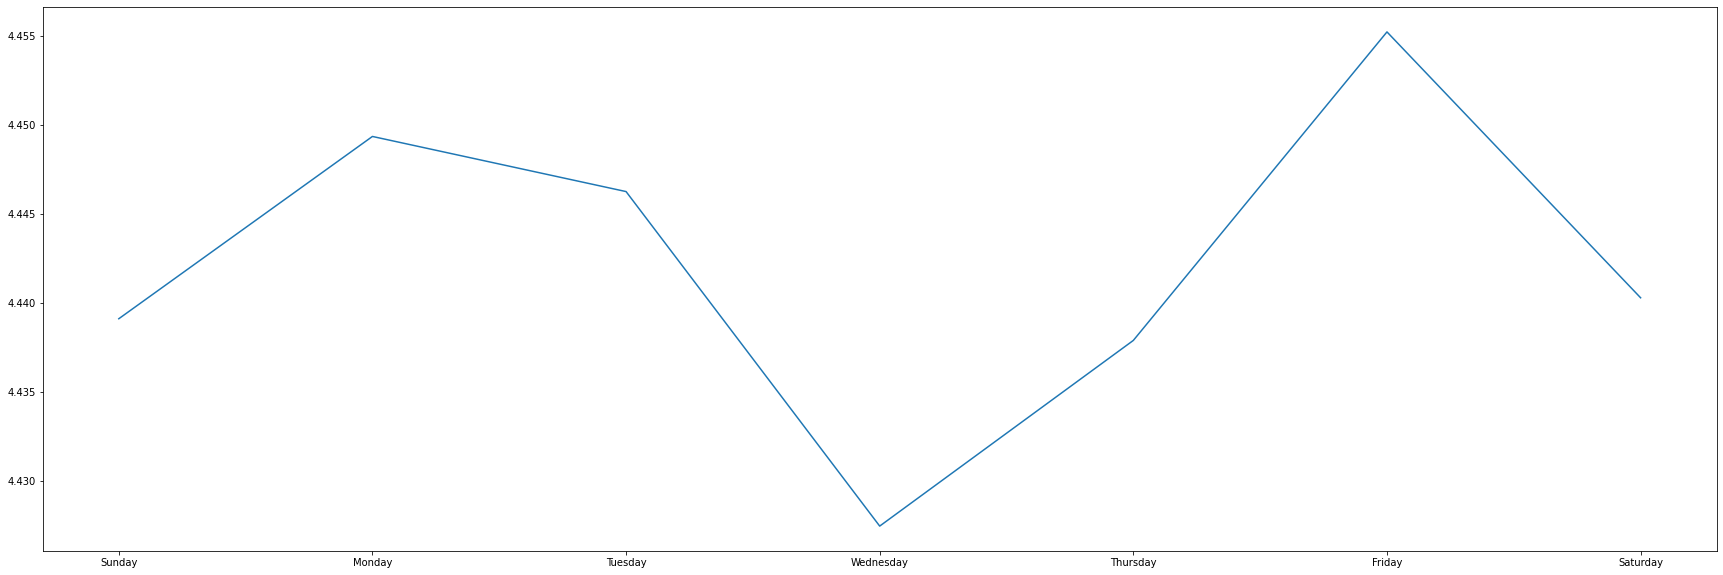

In [21]:
plt.figure(figsize=(30, 10))  # change the plot area from the default
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

## Number of Ratings By Course ##

In [23]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x1980fcbc700>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

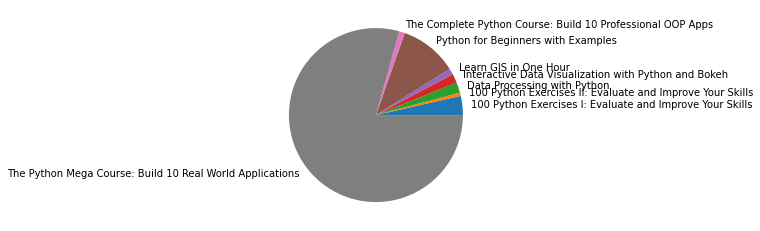

In [25]:
plt.pie(share, labels=share.index)

- ***Matplotlib is great for data exploration but not user-friendly or data visualisation***